In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
wine = load_wine()


In [11]:
wine_std = StandardScaler().fit_transform(wine.data) #정규분포

pca = PCA(n_components=2)       #2차원
wine_pca = pca.fit_transform(wine_std)      #정규분포-->2차원으로변경


In [12]:
df = pd.DataFrame(wine_pca, columns= ['PC1','PC2']) #2차원 정규분포 한것을
                                        #데이터 프레임 및 컬럼생성
df['target'] = wine.target          #타겟 설정(3개)
df

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


In [13]:
from sklearn.cluster import KMeans      #kmean 군집화
kmeans = KMeans(n_clusters = 3, random_state=2021)  #군집화 타겟 갯수 3개

In [14]:
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [16]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
df['target'] = wine.target
df['cluster'] = kmeans.labels_
df.tail()

,PC1,PC2,target,cluster
173,-3.370524,-2.216289,2,2
174,-2.601956,-1.757229,2,2
175,-2.677839,-2.760899,2,2
176,-2.387017,-2.297347,2,2
177,-3.208758,-2.768920,2,2


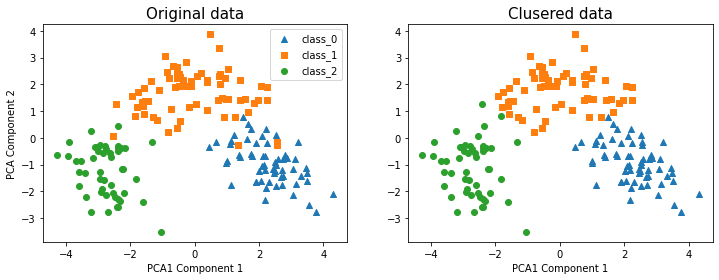

In [20]:
markers = ['^','s','o']
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
for k, column in enumerate(['target','cluster']):
    ax=axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label = wine.target_names[i])
    if k==0:            #Original
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Clusered data', fontsize=15)
    ax.set_xlabel('PCA1 Component 1')

plt.show()